# Setup

In [0]:
!pip install OWSLib
!pip install geopandas

import os
from pathlib import Path
from getpass import getpass
from owslib.wfs import WebFeatureService
import geopandas as gpd
from IPython.display import display

# Current working directory
%cd /content/drive/My Drive/unimelb-cluster-and-cloud-computing-comp90024-2020-sm1/city_analytics/gis

# Set environment variables
os.environ["AURIN_USERNAME"] = input("Please enter your AURIN username: ")
os.environ["AURIN_PASSWORD"] = getpass("Please enter your AURIN password: ")

# Global constants
URL = "http://openapi.aurin.org.au/wfs"  # WFS url

# Global variables
# layername = "aurin:datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_2_gccsa_g43a_lbr_frc_sts_by_age_by_sex_census_2016"  # dataset ID
layername = "aurin:datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa2_seifa_ier_2016"
output_format = "json"
datadir = Path("data")

# Download WFS data

In [0]:
def download_wfs(url, version="1.1.0", typename="", outputFormat="json",
                 filename="", force=False):
  """
  Download Web Feature Service (WFS) data to filename
  url: WFS url
  version: WFS version
  typename: layer name
  outputFormat: format of response data
  fname: output file. Defaults to typename, stored in data directory
  force: if True, overwrite existing filename
  """

  filename = Path(filename or f"{datadir}/{typename}.{outputFormat}")
  if not force and filename.exists():
    return filename

  # Connect service
  wfs = WebFeatureService(url, version=version,
                          username=os.environ["AURIN_USERNAME"],
                          password=os.environ["AURIN_PASSWORD"])
  
  # Request data
  r = wfs.getfeature(typename=typename, outputFormat=outputFormat)

  # Save data
  filename.write_bytes(r.read())

  return filename

datafile = download_wfs(URL, typename=layername, outputFormat=output_format)

# Load WFS data

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                2186 non-null   object  
 1   sa2_main16                        2186 non-null   object  
 2   sa2_name16                        2186 non-null   object  
 3   usual_res_pop                     2186 non-null   int64   
 4   ier_score                         2186 non-null   int64   
 5   national_rank                     2186 non-null   int64   
 6   national_decile                   2186 non-null   int64   
 7   national_percentile               2186 non-null   int64   
 8   state                             2186 non-null   object  
 9   state_rank                        2182 non-null   float64 
 10  state_decile                      2182 non-null   float64 
 11  state_percentile                  2182 non-null 

,id,sa2_main16,sa2_name16,usual_res_pop,ier_score,national_rank,national_decile,national_percentile,state,state_rank,state_decile,state_percentile,min_sa1_score_in_area,max_sa1_score_in_area,ur_pop_wthout_sa1_level_score_pc,geometry
0,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa2_seif...,102011035,Narara,6642,1039,1555,8,72,NSW,397.0,8.0,72.0,941,1127,0.0,"MULTIPOLYGON (((151.32170 -33.39420, 151.32210..."
1,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa2_seif...,103021068,Parkes Region,3390,985,872,4,40,NSW,235.0,5.0,43.0,800,1082,0.0,"MULTIPOLYGON (((147.74980 -32.65020, 147.75200..."
2,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa2_seif...,105011092,Bourke - Brewarrina,4002,870,95,1,5,NSW,15.0,1.0,3.0,743,1019,0.0,"MULTIPOLYGON (((144.34520 -30.25390, 144.32340..."
3,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa2_seif...,106021114,Maitland,6603,994,978,5,45,NSW,263.0,5.0,48.0,877,1179,0.0,"MULTIPOLYGON (((151.53980 -32.72270, 151.53990..."
4,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa2_seif...,108041165,Port Macquarie Region,5297,1029,1439,7,66,NSW,379.0,7.0,68.0,971,1087,0.0,"MULTIPOLYGON (((152.14900 -31.27750, 152.14910..."


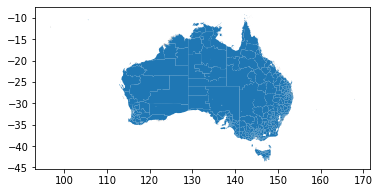

In [190]:
data = gpd.read_file(datafile)
print(data.info())
display(data.head())
data.plot()

In [186]:
data.id[0]

'datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_2_gccsa_g43a_lbr_frc_sts_by_age_by_sex_census_2016.fid-104472e6_171eddf9a57_4b8f'

# References
https://www.datacamp.com/community/tutorials/geospatial-data-python